# Data Cleaning

#### Tasks Completed
* Examine the dataset to understand its structure, including columns, data types, and formats. Identify missing values or inconsistencies.
* Evaluate the quality of the dataset by identifying errors, duplicates, and outliers. Assess completeness and consistency.
* Determine the relevance of the data by mapping dataset attributes to project objectives. Highlight irrelevant or redundant data points.
* Summarize key findings from the structure, quality, and relevance analysis. Prepare actionable insights to guide the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_excel('../../Data/transaction.xlsx')
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,18909018,1704068735,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,36.593837,Sell To Uniswap
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,104.984275,0x415565b0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.079035,0x415565b0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,104.984275,0x415565b0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,18909149,1704070319,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,10.247435,0x415565b0


In [3]:
data.shape


(19836, 8)

In [4]:
data.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [5]:
data.dtypes

Transaction Hash            object
Blockno                      int64
UnixTimestamp                int64
DateTime (UTC)      datetime64[ns]
From                        object
To                          object
Quantity                   float64
Method                      object
dtype: object

In [6]:
data.describe()

,Blockno,UnixTimestamp,Quantity
count,1.983600e+04,1.983600e+04,19836.000000
mean,1.968441e+07,1.713463e+09,377.944387
std,3.220605e+05,3.898956e+06,8007.345063
min,1.890902e+07,1.704069e+09,0.000000
25%,1.946597e+07,1.710817e+09,3.213580
50%,1.973666e+07,1.714100e+09,72.444861
75%,1.993754e+07,1.716527e+09,293.678666
max,2.017186e+07,1.719357e+09,750000.000000


In [7]:
data.isnull().sum()

Transaction Hash    0
Blockno             0
UnixTimestamp       0
DateTime (UTC)      0
From                0
To                  0
Quantity            0
Method              0
dtype: int64

In [8]:
data['Transaction Hash'].unique()

array(['0x27797428fc8aaf088cc707c8788b5d13580696418c79190eda04823ab70d7eb7',
       '0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e8336290b7272ba73bc51',
       '0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9ccbd7d24e2a8b90c294c05',
       ...,
       '0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef013e6064df58a432b343',
       '0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d76442e9373f8a5422fc2452',
       '0x37dfd226ef55d464641ec94fc675ad3692d9af34713215816420b4556a7f8b0a'],
      dtype=object)

In [9]:
data['Transaction Hash'].value_counts()

0x630d72d417c6da379ffc6acf3688fcce84792e4a93d6fea8e1ce70ee202088f3    15
0x0d9678769f1943a9f81c7e50f690bfbd797bdfe1624dc94d8a15f513c91f75f0    12
0x705092688310291813c1057081c022dfdb54825a408bece4e773d591f288cf36    11
0xbff846f99284bed5bdac6a318c0ee2ef5da22a9c321aa8b7f44c4a02431fdf24    11
0x377e726d31cf8e60584cea5b9fb79720ff3dff87ae4413afcb5c8f17269f72b0    11
                                                                      ..
0x5d712a4cad451b5826e5952d4eec8be34b65bf201c02e3e8fcbbd877caa7ddb4     1
0x1937aaea921b1b8f74ab69c9b14006aa0c50e6d89cea649d81f74a4ad20ba9a2     1
0x7c3d6c737193b7dd1473aeb59e5a89f3ea367a04a4b22ea939738e3bb369cd07     1
0x76ea380c6b373829cea031c4bd5d34948beabb7903307e9eb257bd8f9763c54d     1
0x27797428fc8aaf088cc707c8788b5d13580696418c79190eda04823ab70d7eb7     1
Name: Transaction Hash, Length: 9787, dtype: int64

                Blockno  UnixTimestamp  Quantity
Blockno        1.000000       0.999999  0.005760
UnixTimestamp  0.999999       1.000000  0.005759
Quantity       0.005760       0.005759  1.000000


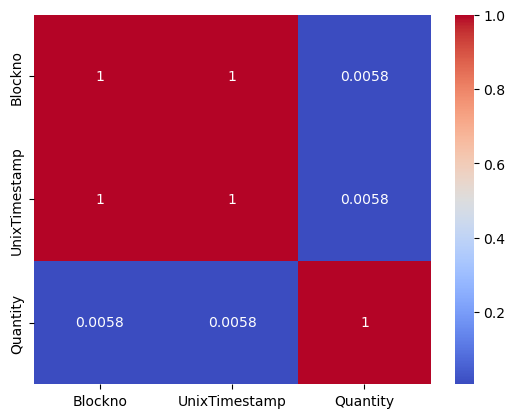

In [10]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
data.sort_values(by='UnixTimestamp')

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,18909018,1704068735,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,36.593837,Sell To Uniswap
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,104.984275,0x415565b0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.079035,0x415565b0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,104.984275,0x415565b0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,18909149,1704070319,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,10.247435,0x415565b0
...,...,...,...,...,...,...,...,...
19828,0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...,20171628,1719353855,2024-06-25 22:17:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.061537,0x415565b0
19833,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5,0x28104d4f703ee5b5011cefe106f54efd56f33f95,1198.366157,Swap Compact
19834,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,706.115108,Swap Compact
19832,0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...,20171862,1719356675,2024-06-25 23:04:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,81.711825,-


<AxesSubplot:>

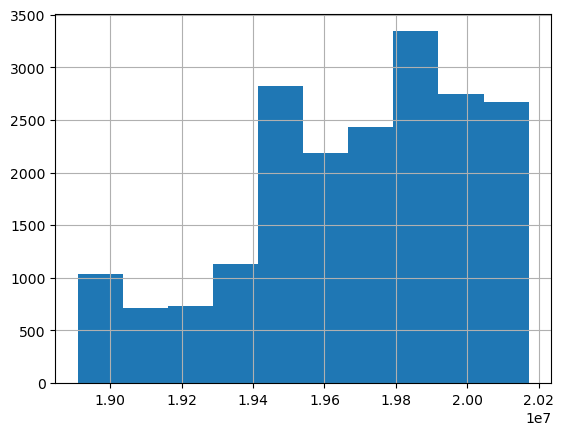

In [12]:
data['Blockno'].hist()

<AxesSubplot:xlabel='UnixTimestamp'>

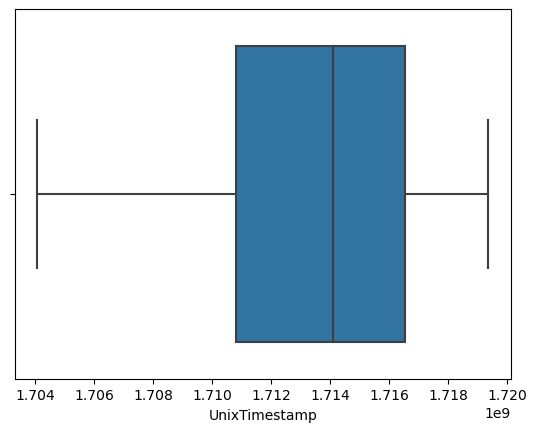

In [13]:
sns.boxplot(data=data,x='UnixTimestamp')

<AxesSubplot:>

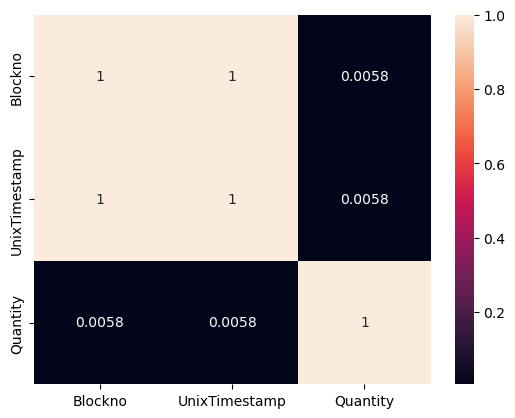

In [14]:
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True)

In [15]:
# Step 2: Preliminary Data Overview
print("Initial Dataset Overview:")
print(data.info())
print("\nSample Rows:")
print(data.head())


Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB
None

Sample Rows:
                                    Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070  

In [18]:
# Check for duplicates in the entire DataFrame
duplicates = data[data.duplicated()]
# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.shape[0])
data = data.drop_duplicates()

Number of duplicate rows: 7


In [19]:
# Removing duplicates
data = data.drop_duplicates()

In [20]:
# Step 3: Check for Relevance (Assume objectives provided as a list of relevant columns)
project_objectives = ['Relevant_Column1', 'Relevant_Column2']  # Replace with actual objectives
all_columns = data.columns.tolist()

In [21]:
# Find irrelevant/redundant columns
irrelevant_columns = [col for col in all_columns if col not in project_objectives]
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]
print("\nIrrelevant Columns:", irrelevant_columns)
print("Redundant Columns:", redundant_columns)
# Drop irrelevant/redundant columns (optional)
data_cleaned = data.drop(columns=irrelevant_columns + redundant_columns, errors='ignore')




Irrelevant Columns: ['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)', 'From', 'To', 'Quantity', 'Method']
Redundant Columns: []


In [22]:
# Step 4: Missing Values Analysis
missing_data_summary = data_cleaned.isnull().sum()
missing_data_rows = data_cleaned.isnull().any(axis=1).sum()

print("\nMissing Data Summary (per column):")
print(missing_data_summary)
print(f"Total Rows with Missing Data: {missing_data_rows}")


Missing Data Summary (per column):
Series([], dtype: float64)
Total Rows with Missing Data: 0


In [23]:
# Step 5: Assess Impact (qualitative decision based on project objectives)
critical_columns = [col for col in project_objectives if col in data_cleaned.columns and data_cleaned[col].isnull().any()]

print("\nCritical Columns with Missing Data:", critical_columns)



Critical Columns with Missing Data: []
